In [188]:
import sys
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'

import scripts.statistics as stats
import scripts.get_namelist as nml
from scripts.common import *


directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr7/1024x1448x512/'

inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
Ny = int(Ny)
y = np.linspace(Ly/2.,-Ly/2.,Ny)

flist = glob.glob(directory+"*utilde*")
flist.sort()
print([f.split('/')[-1] for f in flist])

# And read growth rates
tlist,dlist,rates = growth_rates(directory+'shearlayer_')

Params for this run:
	Mc = 2.0
	Re = 1000.0
	rr = 7.0
Params for this grid:
	N = 1024x1448x512
	L = 80.0x80.0x40.0
['shearlayer_utilde_0001.dat', 'shearlayer_utilde_0002.dat', 'shearlayer_utilde_0003.dat', 'shearlayer_utilde_0004.dat', 'shearlayer_utilde_0005.dat', 'shearlayer_utilde_0006.dat', 'shearlayer_utilde_0007.dat', 'shearlayer_utilde_0008.dat', 'shearlayer_utilde_0009.dat', 'shearlayer_utilde_0010.dat', 'shearlayer_utilde_0011.dat', 'shearlayer_utilde_0012.dat']


Text(0.5,0,'y')

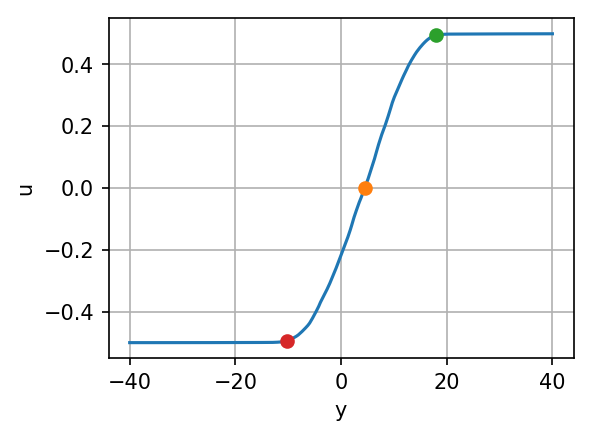

In [191]:
# Get 99% thickness
def get_L99(y,utilde):
    utilde = np.squeeze(utilde)
    du = abs(utilde[-1]-utilde[0])
    utop = 0.99*du/2.
    ubot = -0.99*du/2.
    Ny = np.size(y)
    ibot = np.argmin(abs(utilde[:Ny/2]-ubot)[::])
    itop = np.argmin(abs(utilde[Ny/2:]-utop)[::])+Ny/2
    #itop = np.argmin(abs(utilde[Ny/2:]-utop))+Ny/2
    #ibot = np.argmin(abs(utilde[:Ny/2]-ubot))
    L99 = abs(y[itop]-y[ibot])
    #if L99<0: print('utilde or y misoriented. exiting'); sys.exit()
    return L99, itop, ibot


def get_bounds(flist_plot,y,plotOpt=True):
    mat = np.zeros([len(flist_plot),4])

    for count,fname in enumerate(flist_plot):
        tID = fname.split('_')[-1]
        tID = tID.split('.dat')[0]
        time = nml.read_time(directory,tID)

        # Get 99% thickness
        utilde = np.fromfile( directory + 'shearlayer_utilde_'+str(tID)+'.dat',dtype=float, count=-1, sep=' ')
        L99,ibot,itop = get_L99(y,utilde)
        ic = np.argmin(abs(utilde))
        
        if plotOpt:
            utilde /= -inp.du
            plt.plot(y,utilde)
            plt.plot(y[ic],utilde[ic],'o')
            plt.plot(y[itop],utilde[itop],'o')
            plt.plot(y[ibot],utilde[ibot],'o')
        
        mat[count,0] = y[ic]
        mat[count,1] = y[itop]
        mat[count,2] = y[ibot]
        mat[count,3] = time
    return mat

plt.figure(figsize=(4,3),dpi=150)
mat = get_bounds(flist[-1:],y)
plt.grid(True)
plt.ylabel('u')
plt.xlabel('y')

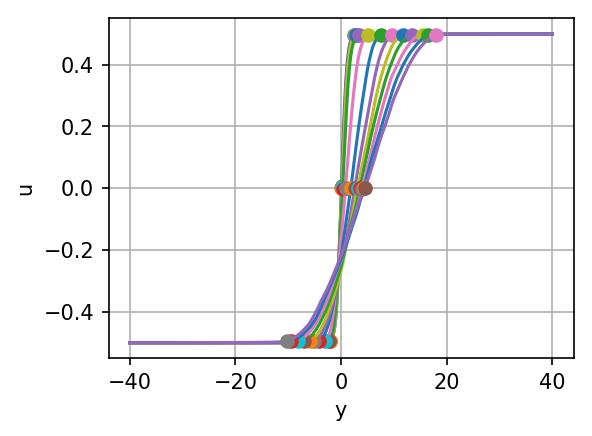

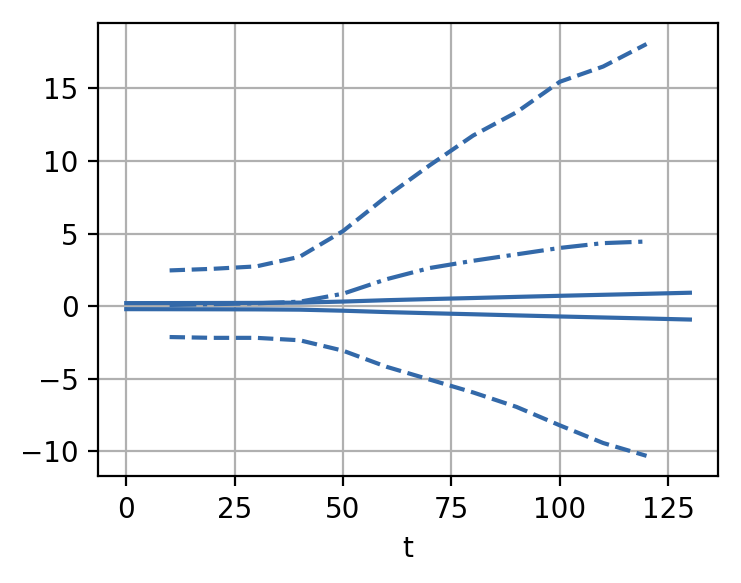

In [165]:
# Get upper, lower bounds and plot around centerline

plt.figure(figsize=(4,3),dpi=150)
mat = get_bounds(flist[0:],y)
plt.grid(True)
plt.ylabel('u')
plt.xlabel('y')
time = mat[:,3]

# Make linear fit
ts = 40
te = 1000
color = myblue
# t_fit,growth_upper,shift_upper = linear_fit(time,upper,ts,te)
# t_fit,growth_lower,shift_lower = linear_fit(time,lower,ts,te)
# t_fit,growth_center,shift_center = linear_fit(time,center,ts,te)

fig = plt.figure(figsize=(4,3),dpi=200)
plt.plot(time,mat[:,0],'-.',label='y_c',color=color)
plt.plot(time,mat[:,1],'--',label='$L_{99}/2$',color=color)
plt.plot(time,mat[:,2],'--',label='$-L_{99}/2$',color=color)
# plt.plot(time,growth_upper*t_fit+shift_upper,'k:')
# plt.plot(time,growth_lower*t_fit+shift_lower,'k:')
# plt.plot(time,growth_center*t_fit+shift_center,'k:')
plt.plot(tlist,dlist/2.,'-',label='$\delta_{\theta}/2$',color=color)
plt.plot(tlist,-dlist/2.,'-',label='$-\delta_{\theta}/2$',color=color)

# Make nice
plt.xlabel('t')
# plt.ylim([-30,30])
# plt.xlim([])
plt.grid(True)

# print('Growth upper,lower: {}, {}'.format(abs(growth_upper/du),(abs(growth_lower/du))))
# print('Growth center: {}'.format(abs(growth_center/du)))
# print('Net Growth upper,lower: {}, {}'.format(abs(growth_upper-growth_center)/du,abs(growth_lower-growth_center)/du))

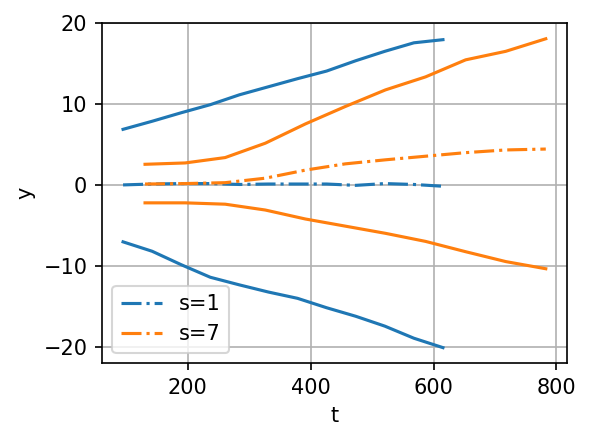

In [159]:
s_list = [1,7]
Mc = '20'


fig = plt.figure(figsize=(4,3),dpi=150)
for i,s in enumerate(s_list):
    directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc%s/rr%i/1024x1448x512/'%(Mc,s)
    filename_prefix = directory + '/shearlayer_'
    inp = nml.inputs(directory)
    Ny = int(Ny)
    y = np.linspace(-Ly/2.,Ly/2.,Ny)
    
    tlist,dlist,rates = growth_rates(directory+'shearlayer_')
    flist = glob.glob(directory+"*utilde*")
    flist.sort()

    mat = get_bounds(flist[1:],y,plotOpt=False)
    time = mat[:,3]*inp.du
    color = 'C%i'%i
    
    plt.plot(time,-mat[:,0],'-.',color=color,label='s=%i'%s)
    plt.plot(time,-mat[:,1],'-',color=color)
    plt.plot(time,-mat[:,2],'-',color=color)
#     plt.plot(tlist,dlist/2.,'-',label='$\delta_{\theta}/2$',color=color)
#     plt.plot(tlist,-dlist/2.,'-',label='$-\delta_{\theta}/2$',color=color)

# Make nice
plt.xlabel('t')
plt.ylabel('y')
# plt.ylim([-30,30])
# plt.xlim([])
plt.grid(True)
plt.legend()

In [185]:
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/'
fname = directory + 'shearlayer_0010.h5'
hf = h5py.File(fname,'r')
q = hf['v']
r = hf['rho']


-0.013129562


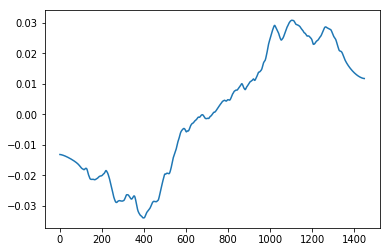

In [186]:
plt.plot(np.mean(np.mean(np.array(q)*np.array(r),axis=-1),axis=0))
print(np.mean(np.mean(np.array(q[:,0,:])*np.array(r[:,0,:]),axis=-1),axis=0))
# plt.imshow(v[:,1447,:])
# plt.colorbar()

